<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Iris-Classification-with-Keras" data-toc-modified-id="Iris-Classification-with-Keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Iris Classification with Keras</a></span></li><li><span><a href="#Load-libraries-and-data" data-toc-modified-id="Load-libraries-and-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load libraries and data</a></span></li><li><span><a href="#Inspect-and-visualize-the-data" data-toc-modified-id="Inspect-and-visualize-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Inspect and visualize the data</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualizations</a></span></li></ul></li><li><span><a href="#Model-the-data" data-toc-modified-id="Model-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model the data</a></span><ul class="toc-item"><li><span><a href="#Create-validation-data-set" data-toc-modified-id="Create-validation-data-set-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create validation data set</a></span></li><li><span><a href="#Build-models" data-toc-modified-id="Build-models-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Build models</a></span><ul class="toc-item"><li><span><a href="#Predictions" data-toc-modified-id="Predictions-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Predictions</a></span></li></ul></li></ul></li></ul></div>

<h1>Iris Classification with Keras</h1>

<img style="float: left; margin-right: 15px;" src="images/iris.jpg" />

Dataset source:  [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)



# Load libraries and data

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load libraries
import os

import numpy as np

from pandas import read_csv
from pandas.plotting import scatter_matrix
from pandas import set_option
from pandas import DataFrame

from matplotlib import pyplot

from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
dataFile = os.path.join(".", "datasets", "iris.data.csv")
data = read_csv(dataFile, header = 0)

# Inspect and visualize the data

## Descriptive statistics

In [4]:
print("data.shape = ", data.shape)

data.shape =  (150, 5)


In [5]:
print(data.head(20))
print("--------")
print(data.dtypes)

    sepalLength  sepalWidth  petalLength  petalWidth        class
0           5.1         3.5          1.4         0.2  Iris-setosa
1           4.9         3.0          1.4         0.2  Iris-setosa
2           4.7         3.2          1.3         0.2  Iris-setosa
3           4.6         3.1          1.5         0.2  Iris-setosa
4           5.0         3.6          1.4         0.2  Iris-setosa
5           5.4         3.9          1.7         0.4  Iris-setosa
6           4.6         3.4          1.4         0.3  Iris-setosa
7           5.0         3.4          1.5         0.2  Iris-setosa
8           4.4         2.9          1.4         0.2  Iris-setosa
9           4.9         3.1          1.5         0.1  Iris-setosa
10          5.4         3.7          1.5         0.2  Iris-setosa
11          4.8         3.4          1.6         0.2  Iris-setosa
12          4.8         3.0          1.4         0.1  Iris-setosa
13          4.3         3.0          1.1         0.1  Iris-setosa
14        

In [6]:
set_option('display.width', 200)
set_option('precision', 2)
data.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [7]:
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [8]:
corr = data.corr(method = "pearson")
corr

,sepalLength,sepalWidth,petalLength,petalWidth
sepalLength,1.00,-0.11,0.87,0.82
sepalWidth,-0.11,1.00,-0.42,-0.36
petalLength,0.87,-0.42,1.00,0.96
petalWidth,0.82,-0.36,0.96,1.00


In [9]:
data.skew()

sepalLength    0.31
sepalWidth     0.33
petalLength   -0.27
petalWidth    -0.10
dtype: float64

## Visualizations

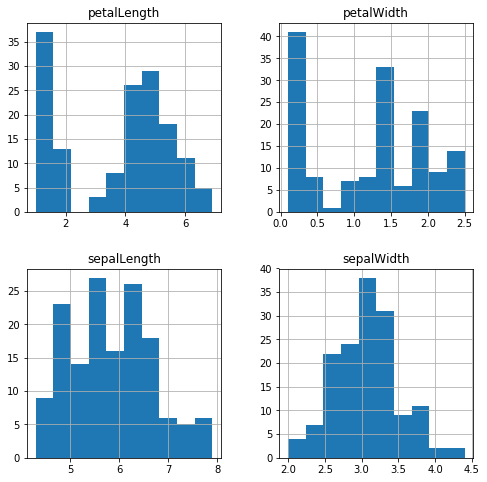

In [10]:
data.hist(figsize = (8,8))
pyplot.show()

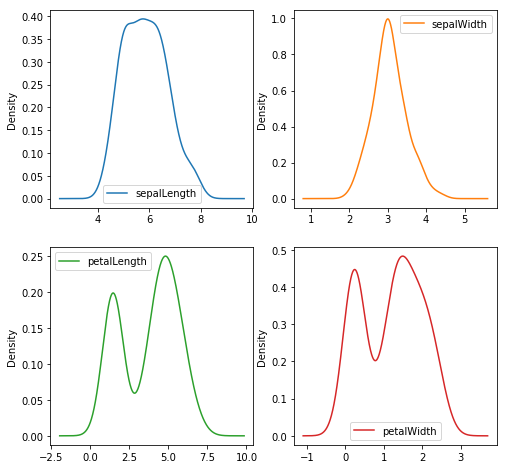

In [11]:
data.plot(kind = 'density', subplots = True, layout = (2,2), sharex = False, figsize = (8,8))
pyplot.show()

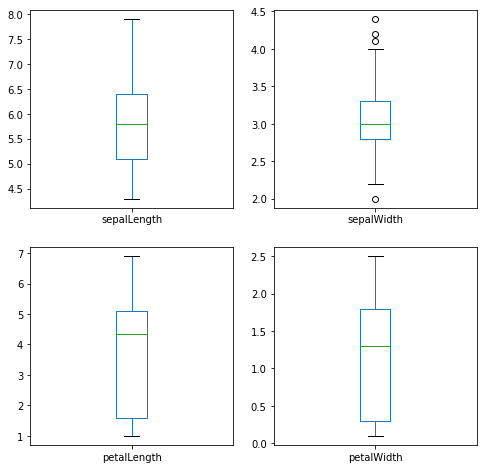

In [12]:
data.plot(kind="box", subplots = True, layout = (2,2), sharex = False, sharey = False, figsize = (8,8))
pyplot.show()

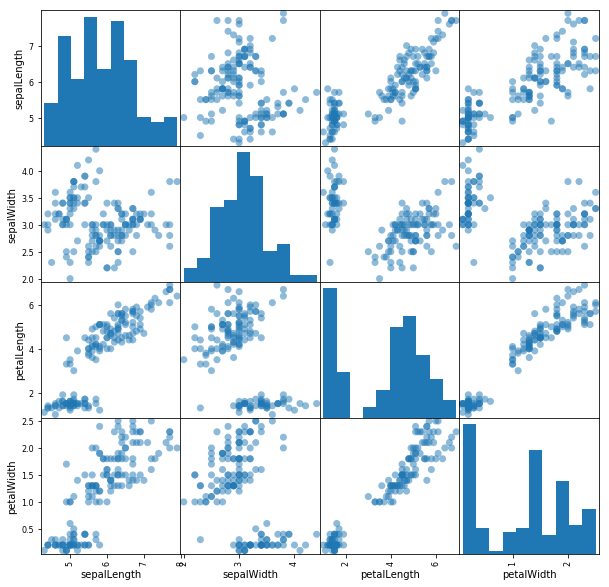

In [13]:
scatter_matrix(data, figsize=(10, 10), s = 200)
pyplot.show()

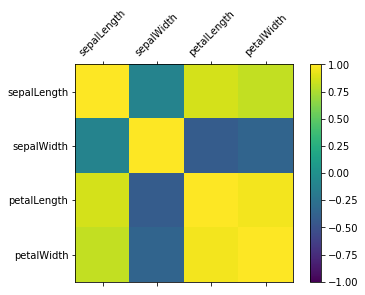

In [14]:
figure = pyplot.figure()
axis = figure.add_subplot(111)
graph = axis.matshow(corr, vmin = -1, vmax = 1)
figure.colorbar(graph)
ticks = np.arange(0, 4, 1)
axis.set_xticks(ticks)
axis.set_yticks(ticks)
axis.set_xticklabels(list(data)[0:4], rotation='45')
axis.set_yticklabels(list(data)[0:4])
pyplot.show()

# Model the data

## Create validation data set

In [20]:
# Seperate X and Y values
x = data.values[:, 0:4]
y = data.values[:, 4]

print("x.shape = ", x.shape)
print("y.shape = ", y.shape)

DataFrame(y).groupby([0]).size()


x.shape =  (150, 4)
y.shape =  (150,)


0
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

So we know that the Y values are strings.  We need to convert these to one hot encodings for the neural network.

In [35]:
_tmp = LabelEncoder().fit(y).transform(y)
yHot = np_utils.to_categorical(_tmp)
yHot.shape

(150, 3)

Now we can create the validation set utilizing the one hot encodings

In [34]:
# Split out validation set -- 80/20 split
seed = 10
valSize = 0.2

xTrain, xVal, yTrain, yVal = train_test_split(x, yHot, test_size = valSize, random_state = seed)

print("--------")
print("xTrain.shape = ", xTrain.shape)
print("yTrain.shape = ", yTrain.shape)
print("xVal.shape = ", xVal.shape)
print("yVal.shape = ", yVal.shape)

--------
xTrain.shape =  (120, 4)
yTrain.shape =  (120, 3)
xVal.shape =  (30, 4)
yVal.shape =  (30, 3)


## Build the model

### Initial pass

To use Keras with Scikit-Learn we'll utilize these handy [wrappers](https://keras.io/scikit-learn-api/).  So first thing we need to do is write a function to build our model that we can pass to the `build_fn` parameter.

In [61]:
# To do:  Edit function to accept params and dynamicly set everything up...
def buildModel():
    model = Sequential()
    model.add(Dense(8, input_dim = 4, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model


Now we can write the rest of the code:

In [84]:
# Define vars and init
folds = 10
seed = 10

np.random.seed(seed)

model = KerasClassifier(build_fn = baseline_model, epochs = 200, batch_size = 5, verbose = 0)
kFold = KFold(n_splits = folds, random_state = seed)
results = cross_val_score(model, xTrain, yTrain, cv = kFold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Accuracy: 97.50% (5.34%)


In [101]:
model = buildModel()
#model.fit(xTrain, yTrain, validation_data = (xVal, yVal), epochs = 200, batch_size = 5, verbose = 0)
model.fit(xTrain, yTrain, epochs = 200, batch_size = 5, verbose = 0)

scores = model.evaluate(xVal, yVal, verbose=0)
print("CNN Error: ", (100-scores[1]*100))

preds = model.predict_classes(xVal)

#print(accuracy_score(yVal, preds))

#preds


CNN Error:  3.333336114883423


In [102]:
#rint(preds)
#p.argmax(preds[0])
#rint(accuracy_score(yVal, preds))

print(preds)
#print(np.argmax(preds, axis = 1))
#print(np.argmax(yVal))
print(np.argmax(yVal, axis = 1))

accuracy_score(np.argmax(yVal, axis = 1), preds)

[1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]
[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]


0.9666666666666667

In [65]:
model.predict(xVal, yVal)

TypeError: predict() takes 2 positional arguments but 3 were given

### Predictions

In [35]:
# Let's examine predictions from the top three models
for i, m in enumerate(models):
    pModelName = m[0]
    pModel = m[1]
    
    pModel.fit(xTrain, yTrain)
    preds = pModel.predict(xVal)
        
    print("*************")
    print("*", pModelName)
    print("*************\n")
    print("accuracy_score = ", accuracy_score(yVal, preds), "\n")
    print("confusion_matrix\n", confusion_matrix(yVal, preds), "\n")
    print("classification_report\n", classification_report(yVal, preds))
    print("")
    print("")
    
    if i > 1:
        break
    
    

*************
* LR
*************

accuracy_score =  0.9 

confusion_matrix
 [[10  0  0]
 [ 0 10  3]
 [ 0  0  7]] 

classification_report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.77      0.87        13
 Iris-virginica       0.70      1.00      0.82         7

    avg / total       0.93      0.90      0.90        30



*************
* LDA
*************

accuracy_score =  1.0 

confusion_matrix
 [[10  0  0]
 [ 0 13  0]
 [ 0  0  7]] 

classification_report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

    avg / total       1.00      1.00      1.00        30



*************
* KNN
*************

accuracy_score =  0.9666666666666667 

confusion_matrix
 [[10  0  0]
 [ 0 12  1]
 [ 0  0  7]] 

classificati

In [46]:
# Multiclass Classification with the Iris Flowers Dataset
import numpy
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataframe = read_csv("./datasets/iris.data.csv", header=0)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
#estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
#kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
#results = cross_val_score(estimator, X, dummy_y, cv=kfold)
#print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


print(X.shape)
print(dummy_y.shape)


(150, 4)
(150, 3)
